In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale

In [6]:
messi_csv = pd.read_csv('messi_barca.csv', encoding = "ISO-8859-1", delimiter=',')  
messi_csv

,Season,Age,Competition,Matches Played,Starts,Minutes played,Goals scored,Assists,PK,PKatt,CrdY,CrdR,Goal/90,Ast/90,G+A/90,G-PK/90,G+A-PK/90
0,2004-2005,17,Champions League,1,1,90,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00
1,2004-2005,17,La Liga,7,0,70,1,0,0,0,0,0,1.29,0.00,1.29,1.29,1.29
2,2005-2006,18,Champions League,6,4,322,1,1,0,0,0,0,0.28,0.28,0.56,0.28,0.56
3,2005-2006,18,La Liga,17,11,911,6,3,0,0,2,0,0.59,0.30,0.89,0.59,0.89
4,2006-2007,19,Champions League,5,4,385,1,0,0,0,1,0,0.23,0.00,0.23,0.23,0.23
5,2006-2007,19,La Liga,26,23,1983,14,3,0,0,2,0,0.64,0.14,0.77,0.64,0.77
6,2007-2008,20,Champions League,9,9,728,6,2,1,1,2,0,0.74,0.25,0.99,0.62,0.87
7,2007-2008,20,La Liga,27,23,1973,10,12,4,4,2,0,0.46,0.55,1.00,0.27,0.82
8,2008-2009,21,Champions League,12,10,927,9,5,0,0,1,0,0.87,0.49,1.36,0.87,1.36
9,2008-2009,21,La Liga,31,27,2516,23,11,3,4,2,0,0.82,0.39,1.22,0.72,1.11


In [7]:
messi_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Season          43 non-null     object 
 1   Age             43 non-null     int64  
 2   Competition     43 non-null     object 
 3   Matches Played  43 non-null     int64  
 4   Starts          43 non-null     int64  
 5   Minutes played  43 non-null     int64  
 6   Goals scored    43 non-null     int64  
 7   Assists         43 non-null     int64  
 8   PK              43 non-null     int64  
 9   PKatt           43 non-null     int64  
 10  CrdY            43 non-null     int64  
 11  CrdR            43 non-null     int64  
 12  Goal/90         43 non-null     float64
 13  Ast/90          43 non-null     float64
 14  G+A/90          43 non-null     float64
 15  G-PK/90         43 non-null     float64
 16  G+A-PK/90       43 non-null     float64
dtypes: float64(5), int64(10), object(2)
m

In [8]:
messi_csv.keys()

Index(['Season', 'Age', 'Competition', 'Matches Played', 'Starts',
       'Minutes played', 'Goals scored', 'Assists', 'PK', 'PKatt', 'CrdY',
       'CrdR', 'Goal/90', 'Ast/90', 'G+A/90', 'G-PK/90', 'G+A-PK/90'],
      dtype='object')

# KNN

In [9]:
X = np.array(messi_csv[['Age', 'Matches Played', 'Starts',
       'Minutes played', 'Goals scored', 'Assists', 'PK', 'PKatt', 'CrdY',
       'CrdR', 'Goal/90', 'Ast/90', 'G+A/90', 'G-PK/90', 'G+A-PK/90']])

In [10]:
competiciones = messi_csv['Competition']
comp = []
for c in competiciones:
    if c == 'Champions League':
        comp.append(0)
    if c == 'La Liga':
        comp.append(1)
    if c == 'Copa del Rey':
        comp.append(2)
    if c == 'Supercopa de España':
        comp.append(3)
        
Y = np.array(comp)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1234, shuffle=True)

In [12]:
Y

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2,
       1, 0, 2, 1, 3, 0, 2, 1, 3, 0, 2, 1, 3, 0, 2, 1, 3, 0, 2, 1, 3])

In [59]:
knn = KNeighborsClassifier(5)

In [60]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

#  Matriz de confusion - validacion

In [61]:
y_pred = knn.predict(x_test)

In [62]:
y_pred

array([0, 0, 1, 3, 2, 3, 1, 2, 0])

In [63]:
y_test

array([0, 0, 1, 3, 0, 0, 1, 2, 0])

In [64]:
cm = confusion_matrix(y_test, y_pred)

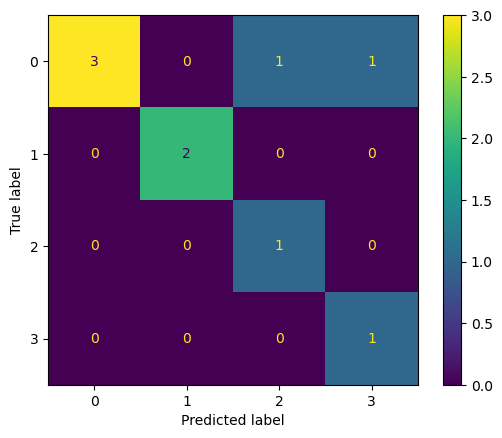

In [65]:
cm_display = ConfusionMatrixDisplay(cm).plot()

#  Matriz de confusion - entrenamiento

In [20]:
y_pred = knn.predict(x_train)

In [21]:
y_pred

array([0, 3, 1, 2, 0, 1, 1, 1, 3, 1, 1, 0, 0, 3, 0, 3, 3, 0, 1, 1, 1, 0,
       1, 0, 2, 0, 3, 3, 0, 1, 2, 0, 3, 1])

In [22]:
y_train

array([0, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 2, 3, 0, 1, 1, 1, 0,
       1, 2, 2, 0, 3, 3, 0, 1, 2, 0, 3, 1])

In [23]:
cm = confusion_matrix(y_train, y_pred)

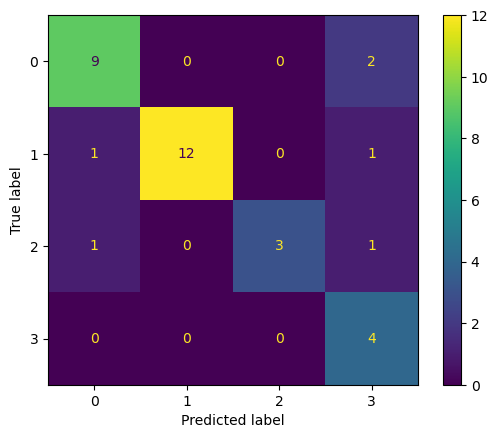

In [24]:
cm_display = ConfusionMatrixDisplay(cm).plot()

# Casos simplificado 2D

In [25]:
X = np.array(messi_csv[['Goals scored', 'Minutes played']])

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1234, shuffle=True)

In [27]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [28]:
y_pred = knn.predict(x_test)

In [29]:
knn.score(x_test, y_test)

0.8888888888888888

In [30]:
knn.score(x_train, y_train)

0.8235294117647058

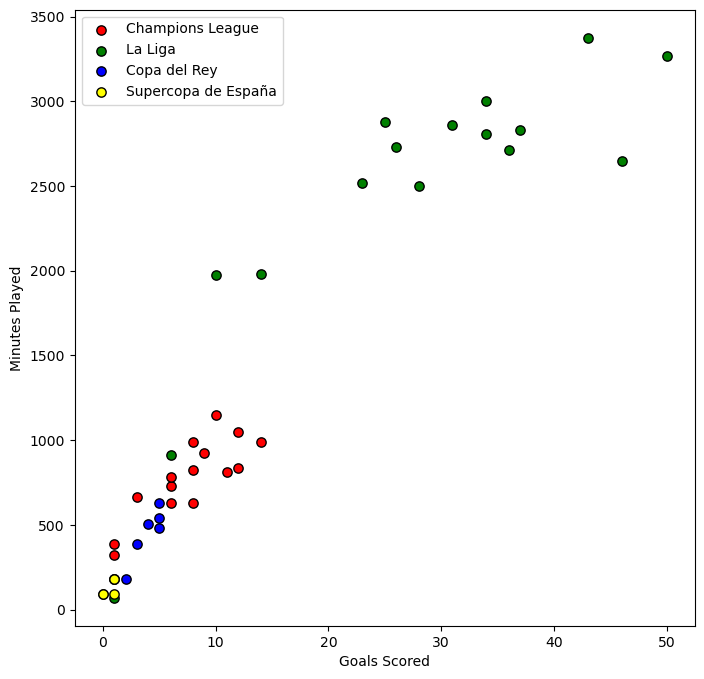

In [31]:
cdict = {0: 'red', 1: 'green', 2: 'blue', 3: 'yellow'}
catdict= {0:'Champions League', 1: 'La Liga', 2:'Copa del Rey', 3:'Supercopa de España'}

figure, ax = plt.subplots(figsize=(8,8))

labels = Y
for g in np.unique(labels):
    ix = np.where(g == labels)
    ax.scatter(X[ix,0], X[ix,1], c = cdict[g], label = catdict[g], s = 45,edgecolor='k')

plt.xlabel('Goals Scored')
plt.ylabel('Minutes Played')
ax.legend()
plt.show()

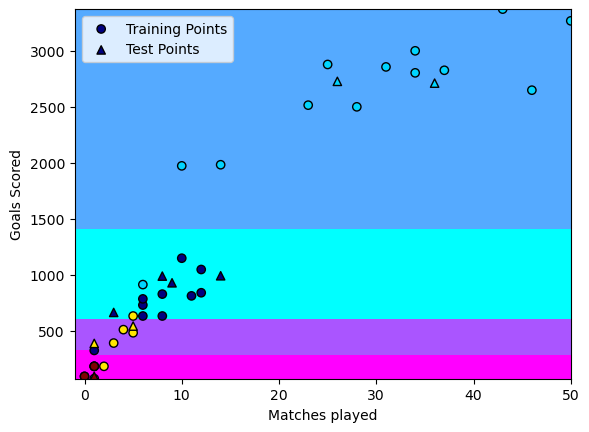

In [32]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 0.5,  X[:, 0].max() + 0.5
y_min, y_max =  X[:, 1].min() - 0.5,  X[:, 1].max() + 0.5
h = 1.0  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = "cool", shading ='auto')

# Plot also the training points
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolors="k", cmap="jet",label='Training Points')
# Plot also the testing points
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_pred, edgecolors="k", cmap="jet",marker="^",label='Test Points')
plt.legend(loc="upper left")
plt.xlabel("Matches played")
plt.ylabel("Goals Scored")

plt.show()

# KNN escalado

In [33]:
X_scaled = minmax_scale(X)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=1234, shuffle=True)

In [35]:
knn = KNeighborsClassifier(5) # Jugar con este valor y ver la variacion en el resultado del grafico.

In [36]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

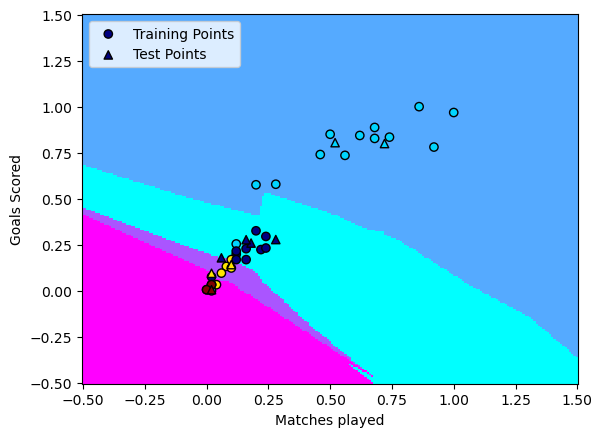

In [37]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_scaled[:, 0].min() - 0.5,  X_scaled[:, 0].max() + 0.5
y_min, y_max =  X_scaled[:, 1].min() - 0.5,  X_scaled[:, 1].max() + 0.5
h = 0.009  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = "cool", shading ='auto')

# Plot also the training points
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolors="k", cmap="jet",label='Training Points')
# Plot also the testing points
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_pred, edgecolors="k", cmap="jet",marker="^",label='Test Points')
plt.legend(loc="upper left")
plt.xlabel("Matches played")
plt.ylabel("Goals Scored")

plt.show()